In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
import json
import nltk
from pyecharts.charts import Map, Bar 
from pyecharts import options as opts
from wordcloud import WordCloud, STOPWORDS

In [41]:
movie = pd.read_csv('./dataset/TMDB5000/tmdb_5000_movies.csv')
credit = pd.read_csv('./dataset/TMDB5000/tmdb_5000_credits.csv')
print('Movie: ', movie.shape, 'Credit: ', credit.shape)

Movie:  (4803, 20) Credit:  (4803, 4)


In [42]:
print((movie['id']==credit['movie_id']).describe())
print()
print((movie['title']==credit['title']).describe())

count     4803
unique       1
top       True
freq      4803
dtype: object

count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object


## Data clean

merge dataset, Delete unnecessary information and delete duplication

In [43]:
del credit['movie_id']
del credit['title']

del movie['homepage']
del movie['original_title']
del movie['overview']
del movie['tagline']

new_df = pd.concat([movie,credit],axis=1)
new_df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64


Missing value processing

In [44]:
nan = new_df['runtime'].isnull()
new_df.loc[nan,:]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


In [45]:
new_df.loc[2656,'runtime']='98'
new_df.loc[4140,'runtime']='82'
new_df.loc[nan,:]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,98,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,82,[],Released,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


In [46]:
nan = new_df['release_date'].isnull()
new_df.loc[nan,:]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
4553,0,[],380097,[],en,0.0,[],[],NaN,0,0.0,[],Released,America Is Still the Place,0.0,0,[],[]


In [47]:
new_df.loc[4553,'release_date']= '2022-06-10'
new_df.loc[nan,:]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
4553,0,[],380097,[],en,0.0,[],[],2022-06-10,0,0.0,[],Released,America Is Still the Place,0.0,0,[],[]


Type Conversion

In [48]:
new_df.loc[:,'release_date'] = pd.to_datetime(new_df.loc[:,'release_date'],format='%Y-%m-%d',errors='coerce')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   id                    4803 non-null   int64         
 3   keywords              4803 non-null   object        
 4   original_language     4803 non-null   object        
 5   popularity            4803 non-null   float64       
 6   production_companies  4803 non-null   object        
 7   production_countries  4803 non-null   object        
 8   release_date          4803 non-null   datetime64[ns]
 9   revenue               4803 non-null   int64         
 10  runtime               4803 non-null   object        
 11  spoken_languages      4803 non-null   object        
 12  status                4803 non-null   object        
 13  title             

In [49]:
new_df['release_year']=new_df['release_date'].dt.year
new_df.loc[:,'release_year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: release_year, Length: 4803, dtype: int64

In [50]:
json_cols = ['genres','keywords','production_companies','spoken_languages','production_countries','cast','crew']

for i in json_cols:
    new_df[i]=new_df[i].apply(json.loads) 

In [51]:
def get_names(x):
    return ','.join(i['name'] for i in x)

In [53]:
for i in json_cols:
    new_df[i]=new_df[i].apply(get_names)

new_df.head(5)

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,release_year
0,237000000,"Action,Adventure,Fantasy,Science Fiction",19995,"culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,"English,Español",Released,Avatar,7.2,11800,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...","Stephen E. Rivkin,Rick Carter,Christopher Boye...",2009
1,300000000,"Adventure,Fantasy,Action",285,"ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,English,Released,Pirates of the Caribbean: At World's End,6.9,4500,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...","Dariusz Wolski,Gore Verbinski,Jerry Bruckheime...",2007
2,245000000,"Action,Adventure,Crime",206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,Spectre,6.3,4466,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...","Thomas Newman,Sam Mendes,Anna Pinnock,John Log...",2015
3,250000000,"Action,Crime,Drama,Thriller",49026,"dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,English,Released,The Dark Knight Rises,7.6,9106,"Christian Bale,Michael Caine,Gary Oldman,Anne ...","Hans Zimmer,Charles Roven,Christopher Nolan,Ch...",2012
4,260000000,"Action,Adventure,Science Fiction",49529,"based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,English,Released,John Carter,6.1,2124,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...","Andrew Stanton,Andrew Stanton,John Lasseter,Co...",2012


## Visualization

### Genres

In [54]:
genres_ = set()
for i in new_df['genres'].str.split(','):
    genres_ = set().union(i,genres_)
genres_=list(genres_)
genres_.remove('')
print(genres_)

['Crime', 'Music', 'Documentary', 'Thriller', 'Drama', 'Mystery', 'Horror', 'Fantasy', 'Family', 'Action', 'History', 'Science Fiction', 'Animation', 'Western', 'Comedy', 'War', 'Foreign', 'TV Movie', 'Romance', 'Adventure']


In [55]:
for i in genres_:
    new_df[i]=new_df['genres'].str.contains(i).apply(lambda x : 1 if x else 0)
new_df.head(5)

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,...,History,Science Fiction,Animation,Western,Comedy,War,Foreign,TV Movie,Romance,Adventure
0,237000000,"Action,Adventure,Fantasy,Science Fiction",19995,"culture clash,future,space war,space colony,so...",en,150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,...,0,1,0,0,0,0,0,0,0,1
1,300000000,"Adventure,Fantasy,Action",285,"ocean,drug abuse,exotic island,east india trad...",en,139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,...,0,0,0,0,0,0,0,0,0,1
2,245000000,"Action,Adventure,Crime",206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,...,0,0,0,0,0,0,0,0,0,1
3,250000000,"Action,Crime,Drama,Thriller",49026,"dc comics,crime fighter,terrorist,secret ident...",en,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,...,0,0,0,0,0,0,0,0,0,0
4,260000000,"Action,Adventure,Science Fiction",49529,"based on novel,mars,medallion,space travel,pri...",en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,...,0,1,0,0,0,0,0,0,0,1


In [56]:
new_genres = pd.DataFrame()
new_genres = new_df.groupby('release_year').sum()
new_genres.head(5)

,budget,id,popularity,revenue,vote_average,vote_count,Crime,Music,Documentary,Thriller,...,History,Science Fiction,Animation,Western,Comedy,War,Foreign,TV Movie,Romance,Adventure
release_year,,,,,,,,,,,,,,,,,,,,,
1916,385907,3059,3.232447,8394751,7.4,60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1925,245000,3060,0.785744,22000000,7.0,21,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1927,92620000,19,32.351527,650422,8.0,657,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1929,379000,66108,2.793049,4358000,12.6,64,0,1,0,1,...,0,0,0,0,0,0,0,0,2,0
1930,3950000,22301,8.484123,8000000,6.1,19,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


The changes of movie genres during year

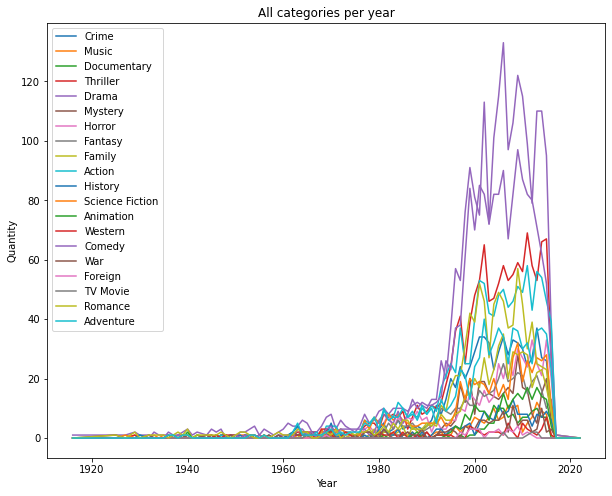

In [57]:
plt.figure(figsize=(10,8))
ax1=plt.subplot(1,1,1)
new_genres[genres_].plot(label='genres',kind='line',ax=ax1)
plt.title('All categories per year')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

Ranking of movies genres shooting quantity

In [58]:
genres = new_genres[genres_].sum(axis=0).sort_values(ascending=True)
genres

TV Movie              8
Foreign              34
Western              82
Documentary         110
War                 144
Music               185
History             197
Animation           234
Mystery             348
Fantasy             424
Family              513
Horror              519
Science Fiction     535
Crime               696
Adventure           790
Romance             894
Action             1154
Thriller           1274
Comedy             1722
Drama              2297
dtype: int64

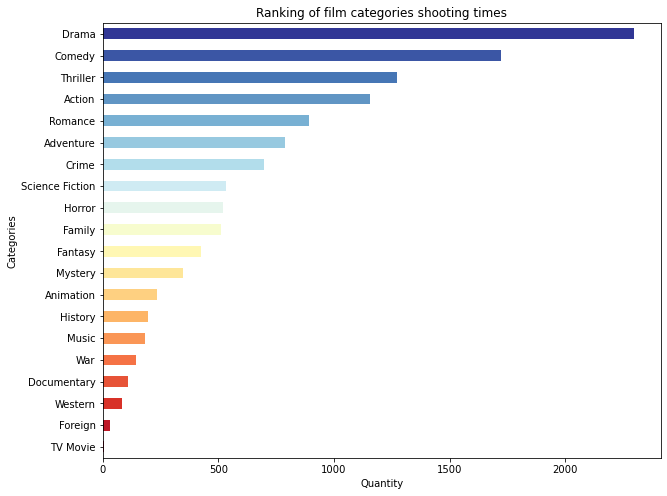

In [59]:
plt.figure(figsize=(10,8))
colors = cm.RdYlBu(np.linspace(0,1,len(genres)))
genres.plot(kind='barh',color=colors)
plt.title('Ranking of film categories shooting times')
plt.xlabel('Quantity')
plt.ylabel('Categories')
plt.show()

Movie genres with highest average ratings

Genres comparison (whether based on novel)
- original movie
- adapted movie

In [60]:
new_df['based on novel'] = new_df['keywords'].str.contains('based on novel').apply(lambda x :1 if x else 0)
new_df['not based on novel'] = new_df['keywords'].str.contains('based on novel').apply(lambda x : 0 if x else 1)
new_genres = new_df[['release_year','based on novel','not based on novel']]
new_genres.head(5)

,release_year,based on novel,not based on novel
0,2009,0,1
1,2007,0,1
2,2015,1,0
3,2012,0,1
4,2012,1,0


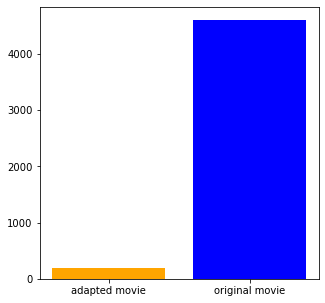

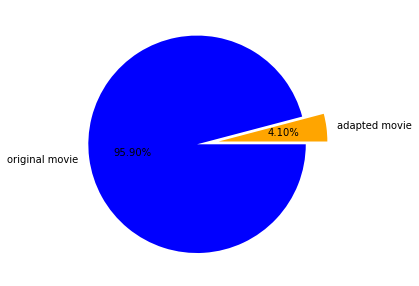

In [61]:
novel_list = [new_genres['based on novel'].sum(axis=0),new_genres['not based on novel'].sum(axis=0)]
plt.figure(0,figsize=(5,5))
plt.bar(['adapted movie', 'original movie'],novel_list,color=['orange','b'])

plt.figure(1,figsize=(5,5))
plt.pie(novel_list, labels = ['adapted movie', 'original movie'],colors=['orange','b'],autopct='%.2f%%',explode=[0.1,0.1])
plt.show()

Voting

In [62]:
genres_df = pd.DataFrame(index=range(0,4803),columns=genres_)
for i in pd.DataFrame(genres).index:
    list_=[]
    for j,t in zip(new_df["genres"],new_df["vote_average"]):
        if i in j:
            list_.append(t)
    genres_df[i]=pd.Series(list_)
genres_vote=genres_df.describe().T
genres_vote

,count,mean,std,min,25%,50%,75%,max
Crime,696.0,6.274138,0.997186,0.0,5.800,6.30,6.900,8.5
Music,185.0,6.355676,1.045478,0.0,6.000,6.50,7.000,8.0
Documentary,110.0,6.238182,1.932246,0.0,5.900,6.80,7.300,8.3
Thriller,1274.0,6.010989,1.035090,0.0,5.500,6.10,6.600,8.3
Drama,2297.0,6.388594,1.060550,0.0,5.900,6.50,7.000,10.0
Mystery,348.0,6.183908,1.046649,0.0,5.800,6.30,6.800,8.1
Horror,519.0,5.626590,1.118132,0.0,5.100,5.80,6.300,8.2
Fantasy,424.0,6.096698,0.920704,2.9,5.500,6.10,6.700,8.3
Family,513.0,6.029630,1.097538,0.0,5.500,6.10,6.700,10.0
Action,1154.0,5.989515,1.020494,0.0,5.500,6.10,6.600,9.3


In [63]:
genres_df = genres_df.T.stack().reset_index(level=1
                            ,drop=True
                            ,inplace= False
                            ).reset_index().rename(columns={"index":"genres",0:"score"})
genres_df["genres"].value_counts().sort_index()

Action             1154
Adventure           790
Animation           234
Comedy             1722
Crime               696
Documentary         110
Drama              2297
Family              513
Fantasy             424
Foreign              34
History             197
Horror              519
Music               185
Mystery             348
Romance             894
Science Fiction     535
TV Movie              8
Thriller           1274
War                 144
Western              82
Name: genres, dtype: int64

In [64]:
genres_df

,genres,score
0,Crime,6.3
1,Crime,7.6
2,Crime,6.1
3,Crime,6.1
4,Crime,8.2
...,...,...
12155,Adventure,7.8
12156,Adventure,4.9
12157,Adventure,5.3
12158,Adventure,6.7


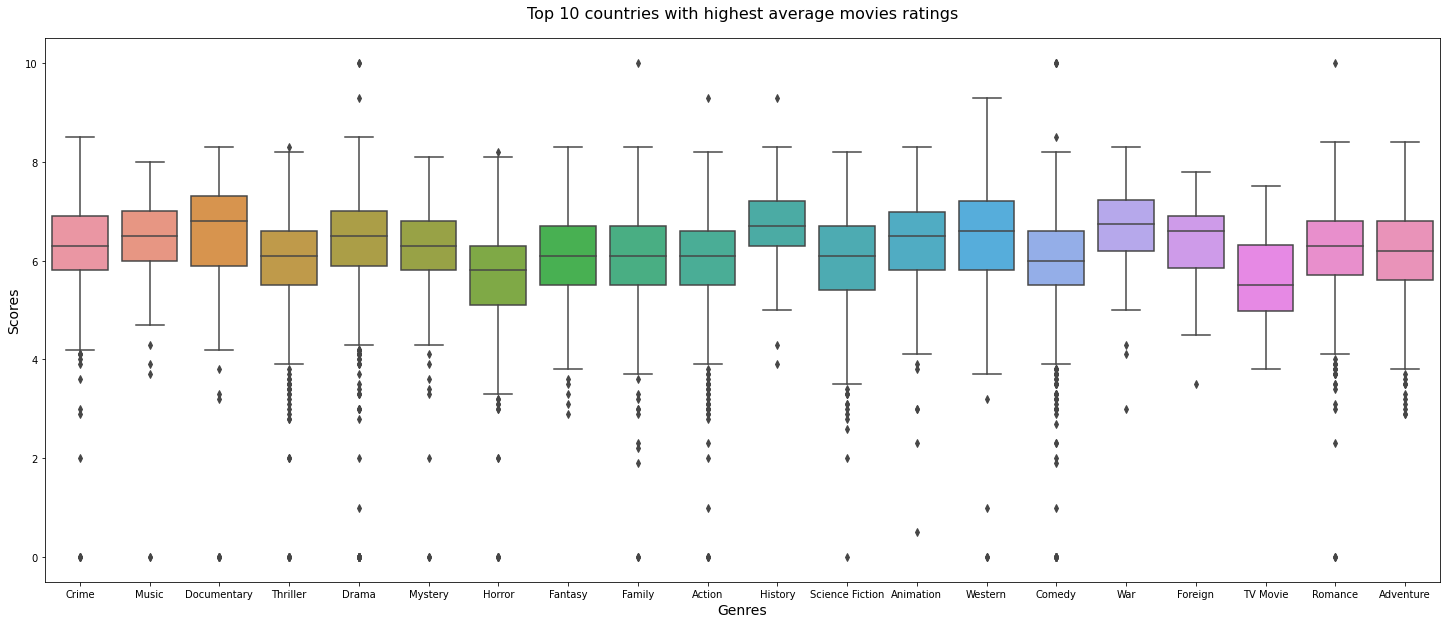

In [65]:
plt.figure(figsize=(25,10))
sns.boxplot(x='genres',y='score', data=genres_df)
plt.xlabel(xlabel="Genres",fontsize=14)
plt.ylabel(ylabel="Scores",fontsize=14)
plt.title('Top 10 countries with highest average movies ratings',fontsize=16,pad=20)
plt.show()

### Countries

In [66]:
index = 0
for i in new_df['production_countries']:
    if ',' in i:
        v = 'Cooperation' 
    elif len(i)==0:
        v = 'nan'
    else:
        v = i.split(',')[0]
    new_df.loc[index,'countries'] = v 
    index+=1

new_countries =pd.DataFrame()
new_countries['countries'] = new_df['countries'].value_counts().drop({'nan',}).index
new_countries['num'] = new_df['countries'].value_counts().drop({'nan',}).values
new_countries.loc[new_countries['countries'] == 'United States of America','countries'] = 'United States'

countries_ = list(new_countries['countries'])

new_countries.head(5)


,countries,num
0,United States,2977
1,Cooperation,1246
2,United Kingdom,131
3,France,49
4,Canada,46


Proportion of film production in different countries

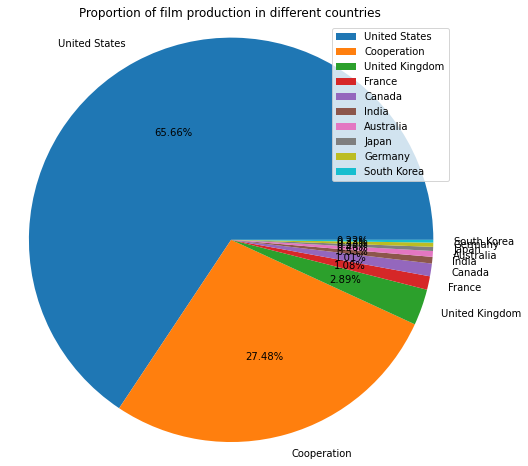

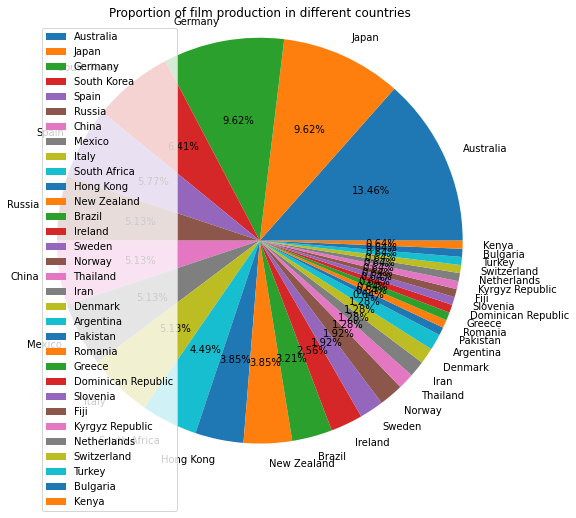

In [67]:
plt.figure(0,figsize=(8,8))
plt.pie(new_countries['num'].head(10),labels=new_countries['countries'].head(10),autopct='%.2f%%')
plt.legend()
plt.title('Proportion of film production in different countries')
plt.axis('equal')

plt.figure(1,figsize=(8,8))
plt.pie(new_countries['num'].tail(32),labels=new_countries['countries'].tail(32),autopct='%.2f%%')
plt.legend(loc='best')
plt.title('Proportion of film production in different countries')
plt.axis('equal')
plt.show()

Top 10 countries with highest average ratings

In [68]:
new_countries = new_countries.drop(index=new_countries[new_countries['countries']=='Cooperation'].index[0])

In [69]:
countries_vote=new_df.groupby("countries")["vote_average"].describe()
new_countries_vote=pd.DataFrame({"countries":countries_vote.index
                              ,"score":countries_vote["mean"]}).sort_values(by=["score"],ascending=False)

new_countries_vote


,countries,score
countries,,
Pakistan,Pakistan,8.000000
Argentina,Argentina,7.600000
Iran,Iran,7.200000
Brazil,Brazil,7.180000
Japan,Japan,7.066667
Sweden,Sweden,7.033333
Netherlands,Netherlands,7.000000
Italy,Italy,6.987500
Germany,Germany,6.986667


<Figure size 576x576 with 0 Axes>

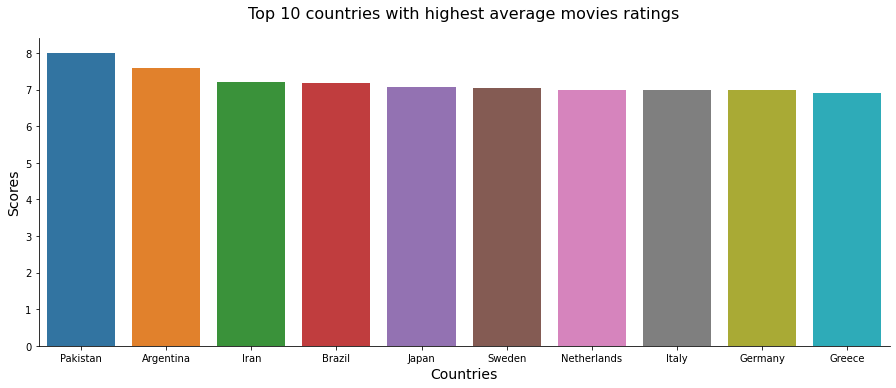

In [70]:
plt.figure(figsize=(8,8))
sns.catplot(x='countries',y='score', data=new_countries_vote[:10], kind='bar',aspect=2.5)
plt.xlabel(xlabel="Countries",fontsize=14)
plt.ylabel(ylabel="Scores",fontsize=14)
plt.title('Top 10 countries with highest average movies ratings',fontsize=16,pad=20)
plt.show()

Voting

In [71]:
countries_df = pd.DataFrame(index=range(0,4803),columns=countries_)
for i in new_countries['countries']:
    list_=[]
    for j,t in zip(new_df["production_countries"],new_df["vote_average"]):
        if i in j:
            list_.append(t)
    countries_df[i]=pd.Series(list_)
countries_vote = countries_df.describe().T
countries_vote

,count,mean,std,min,25%,50%,75%,max
United States,3956.0,6.113498,1.066459,0.0,5.600,6.20,6.800,10.0
United Kingdom,636.0,6.405503,0.941695,0.0,6.000,6.50,7.000,10.0
France,306.0,6.318627,0.919879,0.0,5.900,6.40,6.900,8.1
Canada,261.0,5.980460,0.977891,1.0,5.500,6.00,6.700,8.2
India,54.0,6.140741,1.593562,0.0,5.300,6.15,7.200,10.0
Australia,110.0,6.013636,0.835286,3.9,5.400,6.00,6.675,7.9
Japan,58.0,6.324138,1.081635,3.4,5.800,6.30,7.125,8.3
Germany,324.0,6.263889,0.929275,1.9,5.700,6.30,6.900,8.3
South Korea,18.0,6.544444,1.001894,4.0,6.350,6.60,7.175,8.0
Spain,71.0,6.436620,0.906207,4.6,5.600,6.50,7.100,9.3


In [72]:
countries_df = countries_df.T.stack().reset_index(level=1
                            ,drop=True
                            ,inplace= False
                            ).reset_index().rename(columns={"index":"countries",0:"score"})
countries_df["countries"].value_counts().sort_index()

Argentina                9
Australia              110
Brazil                  13
Bulgaria                 4
Canada                 261
China                   59
Denmark                 20
Dominican Republic       1
Fiji                     1
France                 306
Germany                324
Greece                   3
Hong Kong               48
India                   54
Iran                     4
Ireland                 37
Italy                   72
Japan                   58
Kenya                    1
Kyrgyz Republic          1
Mexico                  30
Netherlands             18
New Zealand             28
Norway                  14
Pakistan                 3
Romania                 12
Russia                  19
Slovenia                 2
South Africa            20
South Korea             18
Spain                   71
Sweden                  19
Switzerland             19
Thailand                 6
Turkey                   1
United Kingdom         636
United States         3956
N

In [73]:
countries_df

,countries,score
0,United States,7.2
1,United States,6.9
2,United States,6.3
3,United States,7.6
4,United States,6.1
...,...,...
6253,Bulgaria,5.8
6254,Bulgaria,4.9
6255,Bulgaria,5.6
6256,Bulgaria,3.3


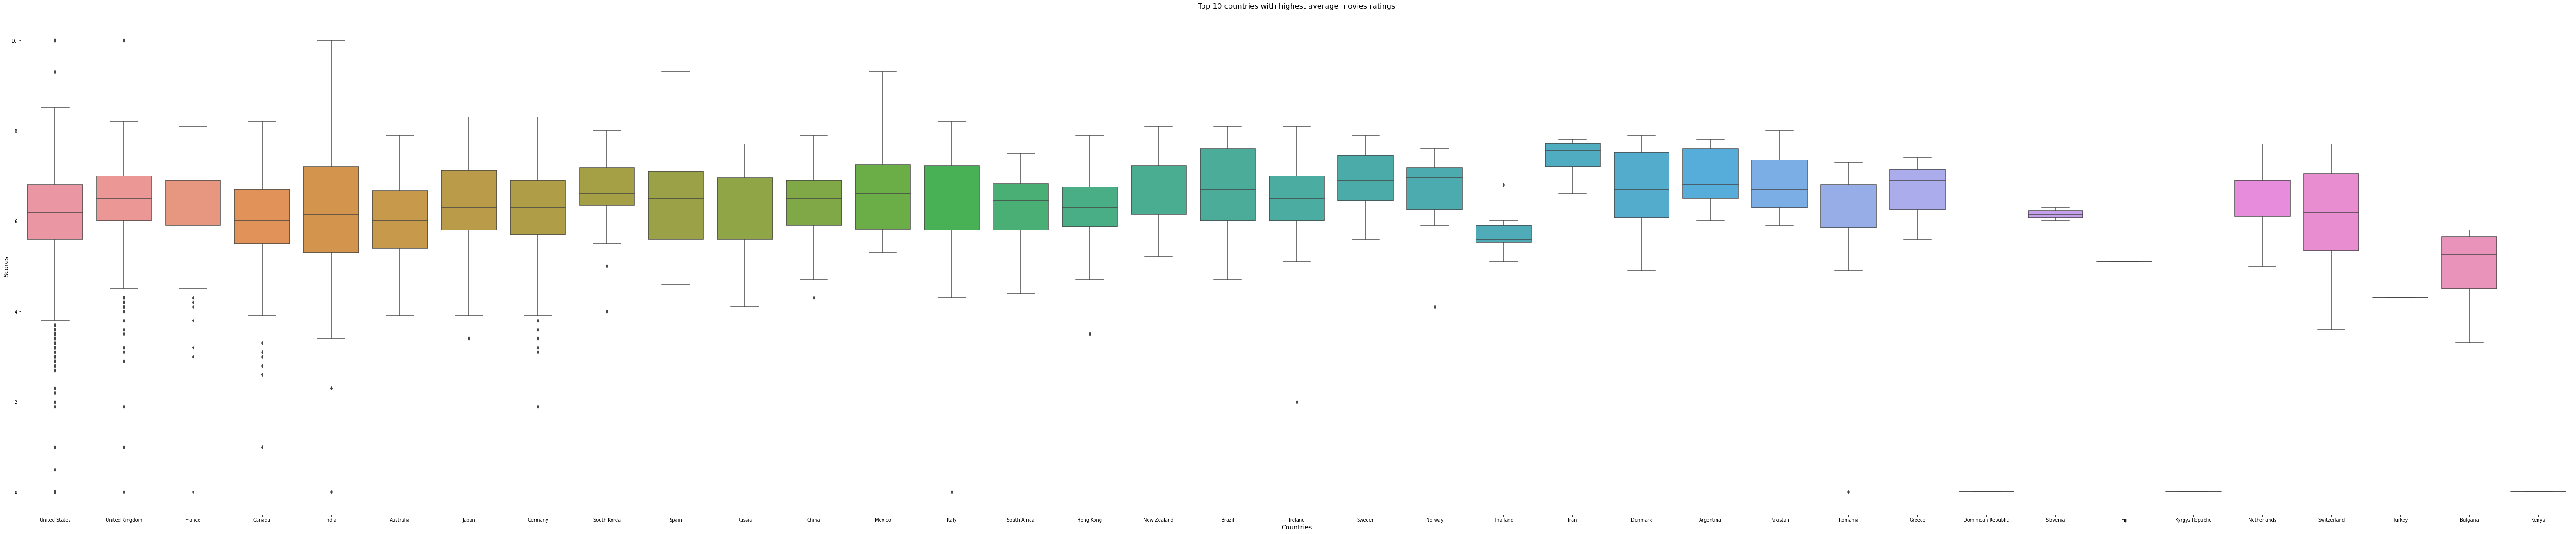

In [79]:
plt.figure(figsize=(100,20))
sns.boxplot(x='countries',y='score', data=countries_df)
plt.xlabel(xlabel="Countries",fontsize=14)
plt.ylabel(ylabel="Scores",fontsize=14)
plt.title('Top 10 countries with highest average movies ratings',fontsize=16,pad=20)
plt.show()


In [75]:
countries_data = [list(i) for i in zip(new_countries['countries'],new_countries['num'])]

print(countries_data)

Map(init_opts=opts.InitOpts(width="1200px", height="1200px")).add("Movies",data_pair=countries_data ,maptype="world").set_series_opts(label_opts=opts.LabelOpts(is_show=False)).set_global_opts(
    title_opts=opts.TitleOpts(title=" d"),  
    visualmap_opts=opts.VisualMapOpts(
        max_ = 99999,
        is_piecewise=True,
        pieces =[{"max": 5, "min": 0, "label": "0-5",} ,
        {"max": 10, "min": 6, "label": "6-10",},
        {"max": 10, "min": 30, "label": "10-30",},
        {"max": 100, "min": 31, "label": "31-100",},
        {"max": 1000, "min": 101, "label": "101-1000",},
        {"max": 9999, "min": 1001, "label": "> 1000",}] 
    )
).render("Map.html")

[['United States', 2977], ['United Kingdom', 131], ['France', 49], ['Canada', 46], ['India', 24], ['Australia', 21], ['Japan', 15], ['Germany', 15], ['South Korea', 10], ['Spain', 9], ['Russia', 8], ['China', 8], ['Mexico', 8], ['Italy', 8], ['South Africa', 7], ['Hong Kong', 6], ['New Zealand', 6], ['Brazil', 5], ['Ireland', 4], ['Sweden', 3], ['Norway', 3], ['Thailand', 2], ['Iran', 2], ['Denmark', 2], ['Argentina', 2], ['Pakistan', 1], ['Romania', 1], ['Greece', 1], ['Dominican Republic', 1], ['Slovenia', 1], ['Fiji', 1], ['Kyrgyz Republic', 1], ['Netherlands', 1], ['Switzerland', 1], ['Turkey', 1], ['Bulgaria', 1], ['Kenya', 1]]


'd:\\UK_Warwick_University\\Course\\CS910_Data Analytics\\Project\\movie\\Map.html'

### Companies

### Directors and Cast

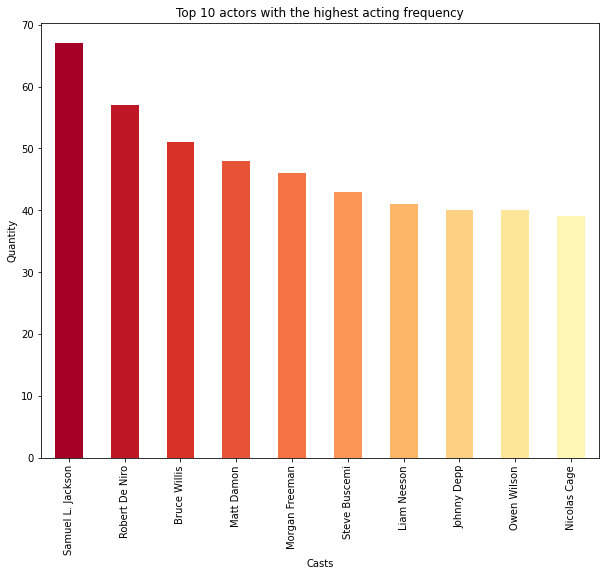

In [127]:
cast_data = new_df['cast'].str.split(',')
list_ = []
for i in cast_data:
    list_.extend(i)
cast = pd.Series(list_).value_counts()[:20].sort_values(ascending=False).drop({'',' Jr.'})

plt.figure(figsize=(10,8))
cast[:10].plot(kind ='bar',color=colors)
plt.title('Top 10 actors with the highest acting frequency')
plt.xlabel('Casts')
plt.ylabel('Quantity')
plt.show()


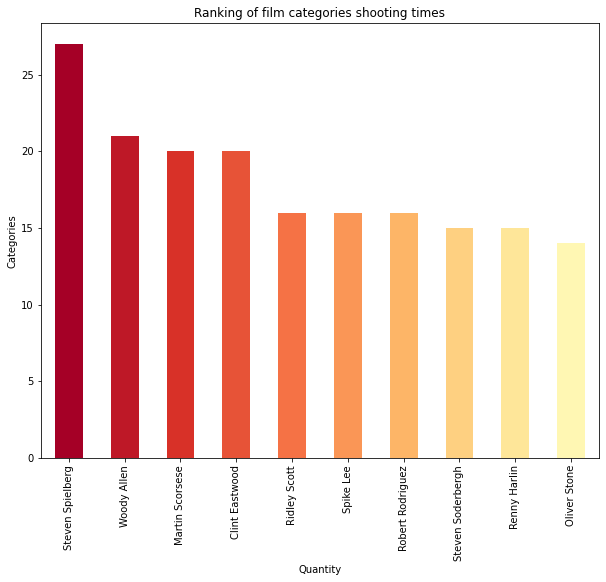

In [125]:
def director_func(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']

direct_df=credit['crew'].apply(json.loads).apply(director_func)
director = direct_df.value_counts()[:10].sort_values(ascending=False)

plt.figure(figsize=(10,8))
director.plot(kind ='bar',color=colors)
plt.title('Top 10 directors with the largest number of movies')
plt.xlabel('Directors')
plt.ylabel('Quantity')
plt.show()

### Keywords

WordCloud diagram

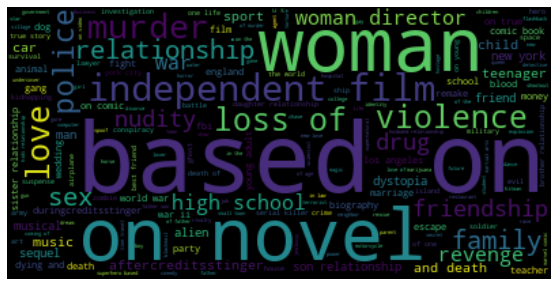

In [76]:
keywords = ''.join(i for i in new_df['keywords'])
worldcloud =WordCloud(background_color='black',stopwords=',').generate(keywords)
plt.figure(figsize=(10,5))
plt.imshow(worldcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Revenue correlation

In [77]:
corr_df = new_df.corr()
corr_df['revenue'].sort_values(ascending=False)

revenue               1.000000
vote_count            0.781487
budget                0.730823
popularity            0.644724
Adventure             0.344400
Fantasy               0.212287
Action                0.203590
Animation             0.199335
vote_average          0.197150
Family                0.170067
Science Fiction       0.152621
release_year          0.090001
based on novel        0.078169
War                   0.002046
Thriller             -0.004488
Mystery              -0.006796
TV Movie             -0.020634
Western              -0.029148
History              -0.031417
Crime                -0.040726
Music                -0.041550
Foreign              -0.042465
Comedy               -0.050369
id                   -0.050425
Romance              -0.065368
Documentary          -0.068089
not based on novel   -0.078169
Horror               -0.082753
Drama                -0.177229
Name: revenue, dtype: float64

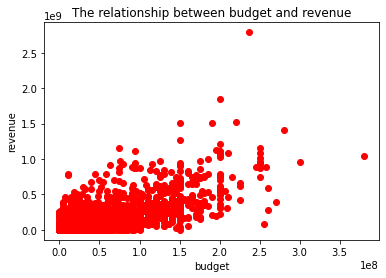

In [78]:
# plt.figure(figsize=(10, 10))
x = new_df.loc[:,'budget']
y = new_df.loc[:,'revenue'] 
plt.scatter(x,y,color='r')
plt.title('The relationship between budget and revenue')
plt.xlabel('budget')
plt.ylabel('revenue')
plt.show()